In [1]:
from scipy import special, linalg, fftpack, optimize, integrate
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#### 1) Basic mathematical functions
* cubic root - $\sqrt[3]{x}$

In [2]:
print(special.cbrt([27, 125]))

[3. 5.]


* exponential 10 - $10^x$

In [3]:
print(special.exp10([3, 10]))

[1.e+03 1.e+10]


* permutation - 
$nPr = \frac{n!}{(n-r)!}$

In [4]:
print(special.perm(4,2))

12.0


* combination - 
$\left(\!
    \begin{array}{c}
        n \\ 
        r
    \end{array}
\!\right) = \frac{n!}{r!(n-r)!}$

In [5]:
print(special.comb(10, 4))

210.0


#### 2) Linear algebra

In [6]:
two_d_array = np.array([[10, 26],
                        [4, 90]])

* determinant

In [7]:
print(round(linalg.det(two_d_array)))

796


* inverse

In [8]:
print(linalg.inv(two_d_array))

[[ 0.11306533 -0.03266332]
 [-0.00502513  0.01256281]]


* eigenvalue, eigenvector

In [9]:
i = 50
j = 100
sq_array = np.random.normal(4, 2.5, size=(i,i))

In [10]:
eg_val, eg_vect = linalg.eig(sq_array)

print('Top 5 eigenvalues (shape: {}): '.format(eg_val[:5].shape), -np.sort(-eg_val)[:5])
print('\nTop eigenvector (shape: {}): '.format(eg_vect[:1].shape), -np.sort(-eg_vect)[:1])

Top 5 eigenvalues (shape: (5,)):  [201.79497428+0.j          16.19125038+0.j
  14.44384491+2.94217712j  14.44384491-2.94217712j
  14.13761829+5.91650818j]

Top eigenvector (shape: (1, 50)):  [[ 0.32724729-0.j          0.32724729+0.j          0.22085645+0.12986793j
   0.22085645-0.12986793j  0.14509106+0.03425713j  0.14509106-0.03425713j
   0.13971388+0.17735608j  0.13971388-0.17735608j  0.1394413 +0.j
   0.07258386+0.23562664j  0.07258386-0.23562664j  0.06945185+0.j
   0.05994411+0.1124069j   0.05994411-0.1124069j   0.05584187+0.01906408j
   0.05584187-0.01906408j  0.05341109+0.01690066j  0.05341109-0.01690066j
   0.03853185+0.01866605j  0.03853185-0.01866605j  0.01290928+0.13660699j
   0.01290928-0.13660699j -0.00568221+0.04792252j -0.00568221-0.04792252j
  -0.00626277+0.03762138j -0.00626277-0.03762138j -0.0115422 +0.25708038j
  -0.0115422 -0.25708038j -0.01372298+0.15709628j -0.01372298-0.15709628j
  -0.01984887+0.11161936j -0.01984887-0.11161936j -0.04967084+0.10684856j
  -0.049670

* singular value decomposition

In [11]:
nd_array = np.random.normal(1, 2, size=(j, i))

U, s, Vh = linalg.svd(nd_array, full_matrices=False)

In [12]:
print('Left unit matrix (U) (shape: {}): '.format(U.shape), U)
print('\nRight unit matrix (Vh) (shape: {}): '.format(Vh.shape), Vh)
print('\nSingular vector (s) (shape: {}): '.format(s.shape), s)
print('\nRank: ', np.linalg.matrix_rank(nd_array))

Left unit matrix (U) (shape: (100, 50)):  [[-0.1369247   0.08191798 -0.03179776 ...  0.37663243  0.10248527
   0.01874659]
 [-0.06680813  0.09305332  0.00767735 ...  0.17983513  0.0600342
   0.17683892]
 [-0.11642731  0.11830469  0.05105992 ...  0.01600177 -0.17278546
   0.10182107]
 ...
 [-0.12547749  0.106874    0.106636   ...  0.01045828 -0.10576351
  -0.05947833]
 [-0.10171238 -0.12411661  0.19594712 ... -0.08034878  0.04920149
   0.04035497]
 [-0.10173274  0.10589197  0.05737    ... -0.08415939  0.13298357
   0.01003391]]

Right unit matrix (Vh) (shape: (50, 50)):  [[-0.15248319 -0.15384868 -0.11549399 ... -0.17074503 -0.15405711
  -0.18022103]
 [-0.03501445  0.15888475 -0.04725377 ...  0.14945902  0.03420258
   0.16242339]
 [ 0.29838267  0.03907593 -0.03894522 ... -0.07415205 -0.03762712
   0.08303049]
 ...
 [-0.18639968  0.16372649 -0.06717715 ...  0.05197313 -0.00918911
  -0.07580834]
 [ 0.02237302 -0.08685244  0.00557222 ...  0.03476282  0.21906345
  -0.02168361]
 [-0.13739309

#### 3) Fourier Transform

In [13]:
# graph variables
f = 5
rng = 25
t = np.linspace(0, 2, 2 * rng, endpoint=False)
a = np.sin(t * np.pi) / np.cos(t * np.exp(0.4 * t))

A = fftpack.fft(a)
fft_freq = fftpack.fftfreq(len(a)) * rng

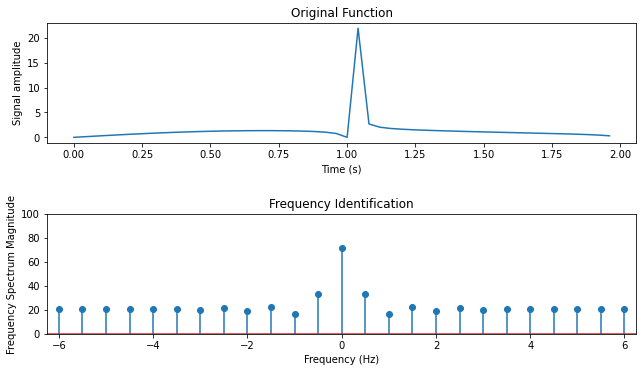

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(10,6))
fig.tight_layout(pad=5.0)
axes[0].plot(t, a)
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Signal amplitude');
axes[0].set_title('Original Function')

axes[1].stem(fft_freq, np.abs(A))
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Frequency Spectrum Magnitude')
axes[1].set_xlim(-rng / 4, rng / 4)
axes[1].set_ylim(0, 100)
axes[1].set_title('Frequency Identification');

#### 4) Optimization

Optimization terminated successfully.
         Current function value: -1.350024
         Iterations: 4
         Function evaluations: 12
         Gradient evaluations: 6


Text([3.85142479], [-1.30002352], 'Minimum: (2.85, -1.35)')

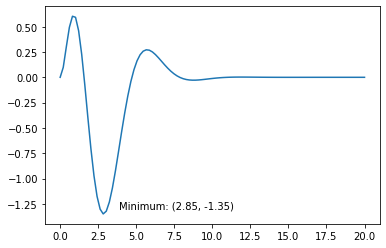

In [15]:
def g(x):
    return 3*x**2 * np.cos(x) / np.exp(x)

xopt = optimize.fmin_bfgs(g, 4)

x = np.linspace(0, 20, num=100)
plt.plot(x, g(x))
plt.annotate('Minimum: ({}, {})'.format(
    round(xopt[0],2), round(g(xopt)[0],2)), 
             xy=(xopt, g(xopt)), 
             xytext=(xopt + 1, g(xopt) + 0.05))

#### 5) Integration
* single - $\int_a^b\mathrm{x}^4{d}x$

In [16]:
f = lambda x: x**4
a = 1
b = 3
res, err = integrate.quad(f, a, b)
print('Integral of f: ', res)
print('Error margin: ', err)

Integral of f:  48.400000000000006
Error margin:  5.373479439185759e-13


* double - $\int_0^{1}\int_0^{x^2}\mathrm{\frac{3x}{y}}{d}x$

In [17]:
int_f = lambda x, y: 3 * x / y
g = lambda x: x**2
res, err = integrate.dblquad(int_f, 0, 1, 0, g)
print('Integral of int_f: ', res)
print('Error margin: ', err)

Integral of int_f:  0.375
Error margin:  1.654509661733337e-14
